# Classification of Paddy Plant Disease Prediction by using Deep Learning

# Package Importing

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from tensorflow.keras.utils import Sequence 
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping,ReduceLROnPlateau #Import callback functions

# Datasets Reading

In [2]:
Image_Folder=r'E:\Ramya\Lead_Projects_New\Paddy_Project\Source Code\Dataset'
Image_Folder

'E:\\Ramya\\Lead_Projects_New\\Paddy_Project\\Source Code\\Dataset'

# Datasets PreProcessing

In [3]:
batch_size = 32
img_height = 224
img_width = 224

In [4]:
Complete_Image = r'E:\Ramya\Lead_Projects_New\Paddy_Project\Source Code\Dataset\Train Image'

In [5]:
# Complete_Test_Image = r'E:\Ramya\Lead_Projects_New\Paddy_Project\Source Code\Dataset\Validation Image'

In [6]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()

#Setting train/test split

Train_Image = train_datagen.flow_from_directory(Complete_Image, target_size=(img_height, img_width),
                                                     class_mode="categorical", batch_size=batch_size, subset="training")
Test_Image = test_datagen.flow_from_directory(Complete_Image, target_size=(img_height, img_width),
                                                    class_mode="categorical", batch_size=batch_size, shuffle=False)

Found 2232 images belonging to 3 classes.
Found 2232 images belonging to 3 classes.


In [7]:
classess = Train_Image.num_classes
classess

3

In [8]:
Test_classess = Test_Image.num_classes
classess

3

# Model Implementation

In [9]:
Mobilenet = MobileNet(weights='imagenet', include_top = False, input_shape = (224,224,3))

In [10]:
for i in Mobilenet.layers:
    i.trainable = False

In [11]:
def main_model(tl_model,classess):
    m_model = tl_model.output
    m_model = GlobalAveragePooling2D()(m_model)
    m_model = Dense(1024,activation='relu')(m_model)
    m_model = Dense(1024,activation='relu')(m_model)
    m_model = Dense(512,activation='relu')(m_model)
    m_model = Dense(classess,activation = 'softmax')(m_model)
    return m_model

In [12]:
combining_model = main_model(Mobilenet,classess)

In [13]:
model = Model(inputs=Mobilenet.input, outputs=combining_model)

In [14]:
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [15]:
earlystop=EarlyStopping(patience=10) #Monitor the performance. If it dips, then stop training
learning_rate_reduce=ReduceLROnPlateau(monitor="val_accuracy",min_lr=0.001) #Change learning rate if not performing good enough
callbacks=[earlystop,learning_rate_reduce]

In [16]:
history = model.fit(Train_Image, validation_data=Test_Image, epochs=10)

Epoch 1/10
70/70 [==============================] - 505s 7s/step - loss: 0.8415 - accuracy: 0.6586 - val_loss: 0.6419 - val_accuracy: 0.7406
Epoch 2/10
70/70 [==============================] - 506s 7s/step - loss: 0.6460 - accuracy: 0.7325 - val_loss: 0.6267 - val_accuracy: 0.7460
Epoch 3/10
70/70 [==============================] - 554s 8s/step - loss: 0.6105 - accuracy: 0.7504 - val_loss: 0.5879 - val_accuracy: 0.7679
Epoch 4/10
70/70 [==============================] - 483s 7s/step - loss: 0.5685 - accuracy: 0.7643 - val_loss: 0.6060 - val_accuracy: 0.7500
Epoch 5/10
70/70 [==============================] - 423s 6s/step - loss: 0.5710 - accuracy: 0.7666 - val_loss: 0.5862 - val_accuracy: 0.7634
Epoch 6/10
70/70 [==============================] - 492s 7s/step - loss: 0.5465 - accuracy: 0.7751 - val_loss: 0.5322 - val_accuracy: 0.7773
Epoch 7/10
70/70 [==============================] - 462s 7s/step - loss: 0.5305 - accuracy: 0.7787 - val_loss: 0.7243 - val_accuracy: 0.6716
Epoch 8/10
70

In [17]:
model.save("mobilent_project.h5")

E:\Users\DLK\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
Test_score = model.evaluate(Test_Image)
Test_score

70/70 [==============================] - 196s 3s/step - loss: 0.5268 - accuracy: 0.7782


[0.5268412232398987, 0.7782257795333862]

# Confusion Matrix of our Model

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools 


target_names = []
for key in Train_Image.class_indices:
    target_names.append(key)

In [20]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

70/70 [==============================] - 188s 3s/step
Confusion Matrix
Confusion matrix, without normalization


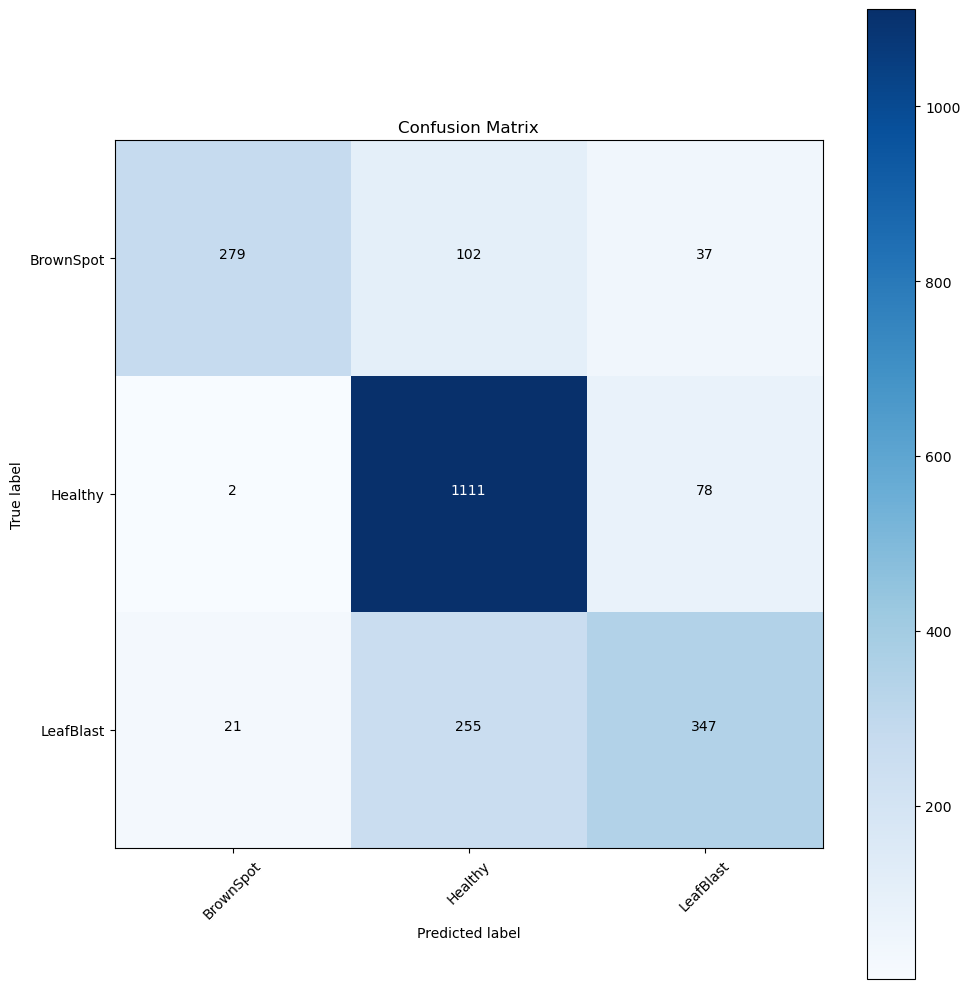

In [21]:
#Confution Matrix and Classification Report
Y_pred_Model = model.predict(Test_Image)
Y_pred_Model = np.argmax(Y_pred_Model, axis=-1)
print('Confusion Matrix') 
CM_Model=confusion_matrix(Test_Image.classes, Y_pred_Model)

plot_confusion_matrix(CM_Model, target_names, title='Confusion Matrix')


# Classification Report

In [22]:
print('Classification Report')
print(classification_report(Test_Image.classes, Y_pred_Model, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

   BrownSpot       0.92      0.67      0.78       418
     Healthy       0.76      0.93      0.84      1191
   LeafBlast       0.75      0.56      0.64       623

    accuracy                           0.78      2232
   macro avg       0.81      0.72      0.75      2232
weighted avg       0.79      0.78      0.77      2232



# Plotting Accuracy and Loss 

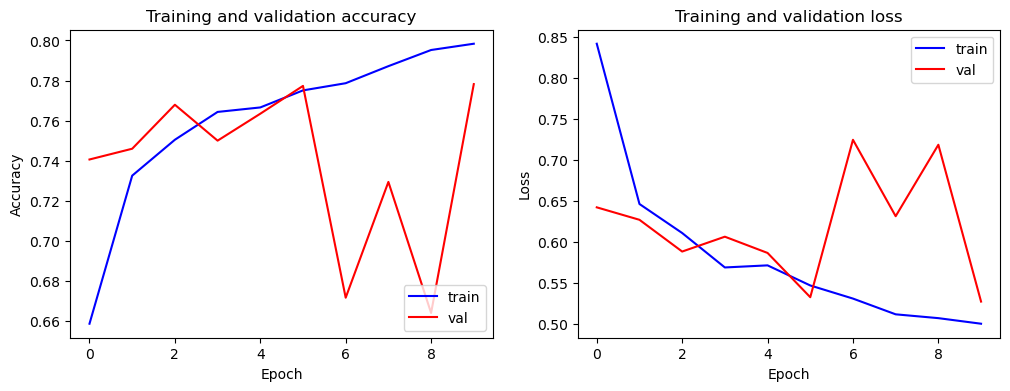

In [23]:
Train_accuracy = history.history['accuracy']
Val_accuracy = history.history['val_accuracy']
Train_loss = history.history['loss']
Val_loss = history.history['val_loss']

epochs = range(len(Train_accuracy))
plt.figure(figsize=(12,4))

# Plotting the accuracy
plt.subplot(1,2,1)
plt.plot(epochs, Train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, Val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')

# Plotting the loss
plt.subplot(1,2,2)
plt.plot(epochs, Train_loss, 'b', label='Training loss')
plt.plot(epochs, Val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

plt.show()

# Testing the Image

In [54]:
labels = Train_Image.class_indices
final_labels = {v: k for k, v in labels.items()}
final_labels

{0: 'BrownSpot', 1: 'Healthy', 2: 'LeafBlast'}

In [55]:
from tensorflow.keras.models import load_model
import ast
from tensorflow.keras.preprocessing import image

In [60]:
def predict_image(imgname, from_test_dir):
    test_image = image.load_img(imgname, target_size = (224, 224))

    plt.imshow(test_image)
    plt.show()

    test_image = np.asarray(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = model.predict(test_image)

    result_dict = dict()
    for key in list(final_labels.keys()):
        result_dict[final_labels[key]] = result[0][key]
    sorted_results = {k: v for k, v in sorted(result_dict.items(), key=lambda item: item[1], reverse=True)}

    if not from_test_dir:
        print('=' * 50)
        for label in sorted_results.keys():
            print("{}: {}%".format(label, sorted_results[label] * 100))

    final_result = dict()
    final_result[list(sorted_results.keys())[0]] = sorted_results[list(sorted_results.keys())[0]] * 100

    return final_result




# Testing Image : BrownSpot Image

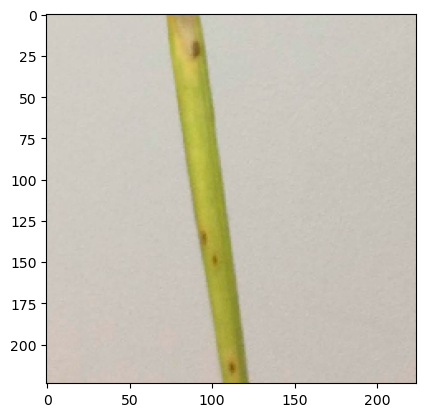

1/1 [==============================] - 0s 60ms/step
BrownSpot: 96.12346291542053%
LeafBlast: 3.8472600281238556%
Healthy: 0.029277789872139692%
Final Result:  {'BrownSpot': 96.12346291542053}


In [69]:
BrownSpot_Image = predict_image(r'E:\Ramya\Lead_Projects_New\Paddy_Project\Source Code\Dataset\Validation Image\BrownSpot\IMG_4862.jpg', False)
print("Final Result: ", BrownSpot_Image)
BrownSpot_Image = list(BrownSpot_Image)

# Recommendation of BrownSpot Image

In [71]:
if BrownSpot_Image == BrownSpot_Image:
    print("Treatment of BrownSpot : Use fungicides (e.g., iprodione, propiconazole, azoxystrobin, trifloxystrobin, and carbendazim) as seed treatments. Treat seeds with hot water (53−54°C) for 10−12 minutes before planting, to control primary infection at the seedling stage.")

elif Leaf_Blast_Image := BrownSpot_Image:
    print("Treatment of LeafBlast:Use a protectant fungicide so that the panicles is protected as it emerges from the boots. Because rice blast is a multiple cycle disease, fungicide applications to control leaf blast early in the season are generally ineffective in reducing the incidence of neck blast and yield losses. ")

else :
    print("No Disease is Identified : This Paddy Plant is Healthy")
    

Treatment of BrownSpot : Use fungicides (e.g., iprodione, propiconazole, azoxystrobin, trifloxystrobin, and carbendazim) as seed treatments. Treat seeds with hot water (53−54°C) for 10−12 minutes before planting, to control primary infection at the seedling stage.


# Testing Image : Healthy Image

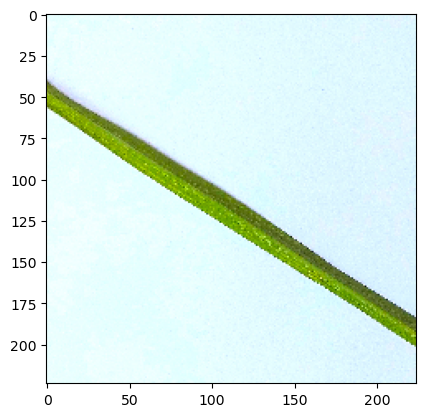

1/1 [==============================] - 0s 66ms/step
Healthy: 52.36231088638306%
LeafBlast: 47.35194146633148%
BrownSpot: 0.28574729803949594%
Final Result of Healthy:  {'Healthy': 52.36231088638306}


In [72]:
Healthy_Image = predict_image(r'E:\Ramya\Lead_Projects_New\Paddy_Project\Source Code\Dataset\Validation Image\Healthy\IMG_20190419_095442.jpg', False)
print("Final Result of Healthy: ", Healthy_Image)
Healthy_Image = list(Healthy_Image)

# Recommendation of Healthy Image

In [73]:
if Healthy_Image == BrownSpot_Image:
    print("Treatment of BrownSpot : Use fungicides (e.g., iprodione, propiconazole, azoxystrobin, trifloxystrobin, and carbendazim) as seed treatments. Treat seeds with hot water (53−54°C) for 10−12 minutes before planting, to control primary infection at the seedling stage.")

elif Healthy_Image == Leaf_Blast_Image:
    print("Treatment of LeafBlast:Use a protectant fungicide so that the panicles is protected as it emerges from the boots. Because rice blast is a multiple cycle disease, fungicide applications to control leaf blast early in the season are generally ineffective in reducing the incidence of neck blast and yield losses. ")

else :
    print("No Disease is Identified : This Paddy Plant is Healthy")
    

No Disease is Identified : This Paddy Plant is Healthy


# Testing Image : Leaf Blast

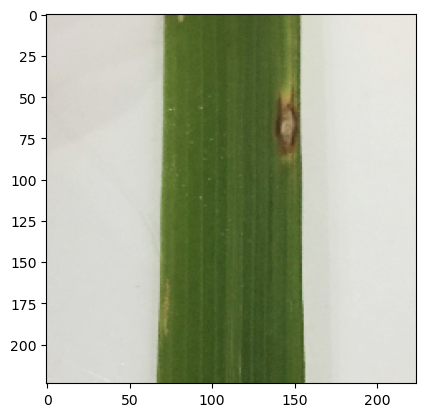

1/1 [==============================] - 0s 64ms/step
LeafBlast: 67.10252165794373%
Healthy: 31.260547041893005%
BrownSpot: 1.6369255259633064%
Final Result of Leaf_Blast:  {'LeafBlast': 67.10252165794373}


In [80]:
Leaf_Blast_Image = predict_image(r'E:\Ramya\Lead_Projects_New\Paddy_Project\Source Code\Dataset\Validation Image\LeafBlast\IMG_5495.jpg', False)
print("Final Result of Leaf_Blast: ", Leaf_Blast_Image)
Leaf_Blast_Image = list(Leaf_Blast_Image)

# Recommendation of LeafBlast Image

In [81]:
if Leaf_Blast_Image == BrownSpot_Image:
    print("Treatment of BrownSpot : Use fungicides (e.g., iprodione, propiconazole, azoxystrobin, trifloxystrobin, and carbendazim) as seed treatments. Treat seeds with hot water (53−54°C) for 10−12 minutes before planting, to control primary infection at the seedling stage.")

elif Leaf_Blast_Image == Leaf_Blast_Image:
    print("Treatment of LeafBlast:Use a protectant fungicide so that the panicles is protected as it emerges from the boots. Because rice blast is a multiple cycle disease, fungicide applications to control leaf blast early in the season are generally ineffective in reducing the incidence of neck blast and yield losses. ")

else :
    print("No Disease is Identified : This Paddy Plant is Healthy")
    

Treatment of LeafBlast:Use a protectant fungicide so that the panicles is protected as it emerges from the boots. Because rice blast is a multiple cycle disease, fungicide applications to control leaf blast early in the season are generally ineffective in reducing the incidence of neck blast and yield losses. 
